<a href="https://colab.research.google.com/github/rits-ritz-rits/sample/blob/master/Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
#from bertopic import BERTopic
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
# Make sure the path is correct for your file in Google Drive
try:
    df = pd.read_csv('/content/drive/My Drive/SICSS/data/Data4.csv')
    print("Data loaded successfully!")
    print(f"Shape of the dataframe: {df.shape}")
    print("First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("Error: Data4.csv not found in the specified path. Please check the path.")
    # Exit or handle the error appropriately if the file isn't found
    # exit() # Or you could set df to None and check later
    df = None # Set df to None if file not found

Mounted at /content/drive
Data loaded successfully!
Shape of the dataframe: (4636, 16)
First 5 rows:
   year location            city                           link  \
0  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
1  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
2  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
3  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
4  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   

                            people_link                      name  \
0  https://sicss.io/2025/amu-law/people         Igor Gontarz, PhD   
1  https://sicss.io/2025/amu-law/people         Paulina Klisowska   
2  https://sicss.io/2025/amu-law/people         Krzysztof Jeromin   
3  https://sicss.io/2025/amu-law/people  Lukasz Szoszkiewicz, PhD   
4  https://sicss.io/2025/amu-law/people           Anna Przybylska   

                                         description     role  \
0  Igor Gontarz 

In [ ]:
# prompt: description_cleanからnoun_chunksを抜き出すコードを書いて。

import spacy

# Load a spaCy model for English
# You might need to install it first: !python -m spacy download en_core_web_sm
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")


In [ ]:
# prompt: description_cleanからnoun_chunksを抜き出すコードを書いて。

#!pip install spacy
#!python -m spacy download en_core_web_sm

#import spacy

# Load the English model
#nlp = spacy.load("en_core_web_sm")

# Assuming 'description_clean' is a column in your DataFrame 'df'
# Check if the DataFrame was loaded successfully
if df is not None and 'description_clean' in df.columns:
    # Function to extract noun chunks
    def extract_noun_chunks(text):
        if pd.isna(text): # Handle potential NaN values
            return []
        doc = nlp(str(text)) # Ensure text is a string
        return [chunk.text for chunk in doc.noun_chunks]

    # Apply the function to the 'description_clean' column
    df['noun_chunks'] = df['description_clean'].apply(extract_noun_chunks)

    # Display the first few rows with the new 'noun_chunks' column
    print("\nDataFrame with extracted noun chunks:")
    print(df[['description_clean', 'noun_chunks']].head())
else:
    print("\nCould not process noun chunks: DataFrame not loaded or 'description_clean' column not found.")



DataFrame with extracted noun chunks:
                                   description_clean  \
0  Igor Gontarz is a lecturer at the Adam Mickiew...   
1  Paulina Klisowska is a graduate at the Faculty...   
2  Krzysztof Jeromin is a graduate student in Eur...   
3  Lukasz Szoszkiewicz is an Assistant Professor ...   
4  Anna Przybylska is a fourth-year Law student a...   

                                         noun_chunks  
0  [Igor Gontarz, a lecturer, the Adam Mickiewicz...  
1  [Paulina Klisowska, a graduate, the Faculty, L...  
2  [Krzysztof Jeromin, a graduate student, Europe...  
3  [Lukasz Szoszkiewicz, an Assistant Professor, ...  
4  [Anna Przybylska, a fourth-year Law student, t...  


In [ ]:
# prompt: # prompt: noun_chunksから、stop_wordsを除いて、Countするdictionaryを作る

from collections import Counter

# Define a set of stop words
stop_words = set([
    "a", "an", "the", "and", "or", "but", "in", "on", "at", "for", "with",
    "of", "to", "from", "by", "is", "are", "was", "were", "be", "been",
    "being", "have", "has", "had", "having", "do", "does", "did", "doing",
    "can", "could", "will", "would", "should", "may", "might", "must",
    "this", "that", "these", "those", "it", "its", "he", "she", "we",
    "they", "i", "me", "us", "him", "her", "them", "my", "your", "his",
    "her", "our", "their", "mine", "yours", "hers", "ours", "theirs",
    "who", "whom", "whose", "which", "where", "when", "why", "how",
    "what", "ever", "any", "some", "all", "none", "no", "not", "only",
    "just", "much", "many", "few", "more", "most", "less", "least",
    "other", "another", "such", "so", "too", "very", "around", "about",
    "above", "below", "before", "after", "between", "through", "during",
    "while", "since", "until", "again", "further", "then", "once",
    "here", "there", "when", "where", "why", "how", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "no", "nor",
    "not", "only", "own", "same", "so", "than", "too", "very", "s", "t",
    "can", "will", "just", "don", "should", "now",
    # Add any other stop words you want to exclude
])

# Check if the 'noun_chunks' column exists
if 'noun_chunks' in df.columns:
    # Flatten the list of noun chunks from all rows
    all_noun_chunks = [chunk.lower() for sublist in df['noun_chunks'].dropna() for chunk in sublist]

    # Filter out stop words from the noun chunks
    filtered_noun_chunks = [chunk for chunk in all_noun_chunks if chunk not in stop_words]

    # Count the occurrences of each filtered noun chunk
    noun_chunk_counts = Counter(filtered_noun_chunks)

    # Display the counts (e.g., top 20 most frequent)
    print("\nMost common noun chunks (excluding stop words):")
    print(noun_chunk_counts.most_common(20))
else:
    print("\n'noun_chunks' column not found. Please ensure the previous steps ran successfully.")


Most common noun chunks (excluding stop words):
[('the university', 1885), ('sociology', 855), ('the department', 667), ('political science', 589), ('his research', 574), ('economics', 569), ('her research', 565), ('university', 461), ('an assistant professor', 459), ('a phd student', 433), ('technology', 424), ('computational social science', 404), ('communication', 378), ('research', 368), ('computer science', 366), ('a phd candidate', 363), ('machine learning', 361), ('data science', 354), ('her research interests', 333), ('science', 325)]


In [ ]:
# prompt: noun_chunk_countsから、頻度５以下のものを除く

# Create a new dictionary containing only the noun chunks with a frequency greater than 5
frequent_noun_chunks = {chunk: count for chunk, count in noun_chunk_counts.items() if count > 5}

# Display the frequent noun chunks
print("\nFrequent noun chunks (frequency > 5):")
frequent_noun_chunks


Frequent noun chunks (frequency > 5):


{'a lecturer': 80,
 'the adam mickiewicz university': 8,
 'poznań': 13,
 'the right': 7,
 'information': 130,
 'public administration': 58,
 'member': 15,
 'research projects': 19,
 'digitalisation': 7,
 'a graduate': 17,
 'the faculty': 74,
 'law': 206,
 'administration': 15,
 'amu': 8,
 'a master’s degree': 76,
 'european law': 9,
 'research': 368,
 'social media': 276,
 'a speaker': 6,
 'her academic interests': 8,
 'their impact': 10,
 'privacy': 63,
 'a graduate student': 47,
 'business management': 8,
 'access': 38,
 'a post': 8,
 'part': 96,
 'ethics': 36,
 'policies': 32,
 'his research interests': 319,
 'the impact': 133,
 'new technologies': 10,
 'fundamental rights': 7,
 'sicss': 30,
 'an assistant professor': 459,
 'adam mickiewicz university': 20,
 'children': 39,
 'human rights': 34,
 'data science': 354,
 'python': 63,
 'knowledge': 57,
 'spss': 16,
 'a bachelor’s degree': 45,
 'the application': 62,
 'artificial intelligence': 156,
 'its impact': 11,
 'the state': 15,
 

In [ ]:
print(len(frequent_noun_chunks.keys()))

2250


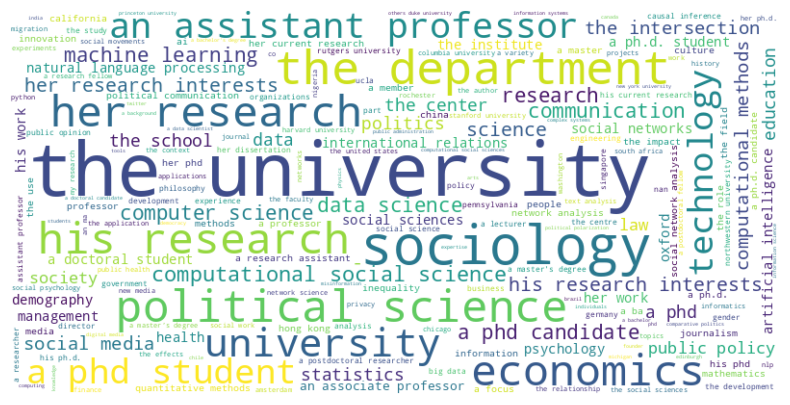

In [ ]:
# prompt: frequent_noun_chunksからワードクラウドを作成して

!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if frequent_noun_chunks dictionary is not empty
if frequent_noun_chunks:
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequent_noun_chunks)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("\nNo frequent noun chunks found with frequency > 5 to create a word cloud.")

In [ ]:
# prompt: word cloudを、/content/drive/MyDrive/SICSS/outへ保存

import os

# Define the output directory
output_dir = '/content/drive/MyDrive/SICSS/out'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
  os.makedirs(output_dir, exist_ok=True)

# Define the path to save the word cloud image
wordcloud_filepath = os.path.join(output_dir, 'noun_chunks_wordcloud.png')

# Save the word cloud image to the specified path
if 'wordcloud' in locals() and wordcloud:
    wordcloud.to_file(wordcloud_filepath)
    print(f"\nWord cloud saved to: {wordcloud_filepath}")
else:
    print("\nWord cloud object not created or is empty. Cannot save.")


Word cloud saved to: /content/drive/MyDrive/SICSS/out/noun_chunks_wordcloud.png


In [ ]:
# prompt: 英語のBERTモデルを使って、df["description_clean_replaced"]を入力して、[CLS]のvectorのデータを取り出す。

!pip install transformers sentence-transformers

from transformers import BertModel, BertTokenizer
import torch

# Check if df is loaded and has the necessary column
if df is not None and 'description_clean_replaced' in df.columns:
    # Load the BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Function to get the [CLS] token vector
    def get_cls_embedding(text):
        if pd.isna(text):
            return None
        # Ensure text is a string
        text = str(text)
        # Tokenize and add special tokens
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        # Get model output
        with torch.no_grad():
            outputs = model(**inputs)

        # The [CLS] token embedding is the first token's embedding
        # outputs[0] is the sequence of hidden states
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()

        return cls_embedding.cpu().numpy() # Move to CPU and convert to numpy

    # Apply the function to the 'description_clean_replaced' column
    # This might take some time depending on the size of your DataFrame
    df['cls_vector'] = df['description_clean_replaced'].apply(get_cls_embedding)

    # Display the first few rows with the new 'cls_vector' column
    print("\nDataFrame with [CLS] token vectors:")
    print(df[['description_clean_replaced', 'cls_vector']].head())

    # You can now use the 'cls_vector' column for downstream tasks like clustering
    # or visualization. For example, converting the column of numpy arrays to a list of lists:
    # cls_vectors_list = df['cls_vector'].tolist()
    # Note: Handle rows where cls_vector might be None if the input text was NaN

else:
    print("\nCould not generate [CLS] token vectors: DataFrame not loaded or 'description_clean_replaced' column not found.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


DataFrame with [CLS] token vectors:
                          description_clean_replaced  \
0  Igor Gontarz Instituto Sapientia a lecturer An...   
1  Paulina Klisowska Instituto Sapientia a gradua...   
2  Krzysztof Jeromin Instituto Sapientia a gradua...   
3  Lukasz Szoszkiewicz Instituto Sapientia an Ass...   
4  American Nephrology Nurses Association Przybyl...   

                                          cls_vector  
0  [-0.5522722, 0.0045313057, -0.043327015, -0.18...  
1  [-0.87453085, 0.07032981, -0.48686063, -0.4293...  
2  [-0.8127091, -0.03747278, -0.0025906905, -0.03...  
3  [-0.8916157, -0.18994685, 0.118105106, -0.4629...  
4  [-0.1597851, 0.0044620507, -0.8559404, -0.5057...  


In [ ]:
# prompt: clsのベクター入りのデータを、Data_CLSとして保存して

# Filter out rows where 'cls_vector' is None
df_with_vectors = df.dropna(subset=['cls_vector']).copy()

# Save the DataFrame with CLS vectors
# Define the path to save the DataFrame
Data_CLS_filepath = os.path.join(output_dir, 'Data_CLS.pkl') # Using pkl for preserving numpy arrays

try:
    df_with_vectors.to_pickle(Data_CLS_filepath)
    print(f"\nDataFrame with CLS vectors saved to: {Data_CLS_filepath}")
except Exception as e:
    print(f"\nError saving Data_CLS: {e}")

# You can verify by loading it back
# loaded_df = pd.read_pickle(Data_CLS_filepath)
# print("\nLoaded DataFrame head:")
# print(loaded_df.head())



DataFrame with CLS vectors saved to: /content/drive/MyDrive/SICSS/out/Data_CLS.pkl



DataFrame loaded successfully from: /content/drive/MyDrive/SICSS/out/Data_CLS.pkl
Shape of the loaded DataFrame: (4554, 18)
First 5 rows of loaded DataFrame:
   year location            city                           link  \
0  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
1  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
2  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
3  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   
4  2025  AMU/Law  Poznań, Poland  https://sicss.io/2025/amu-law   

                            people_link                      name  \
0  https://sicss.io/2025/amu-law/people         Igor Gontarz, PhD   
1  https://sicss.io/2025/amu-law/people         Paulina Klisowska   
2  https://sicss.io/2025/amu-law/people         Krzysztof Jeromin   
3  https://sicss.io/2025/amu-law/people  Lukasz Szoszkiewicz, PhD   
4  https://sicss.io/2025/amu-law/people           Anna Przybylska   

                       

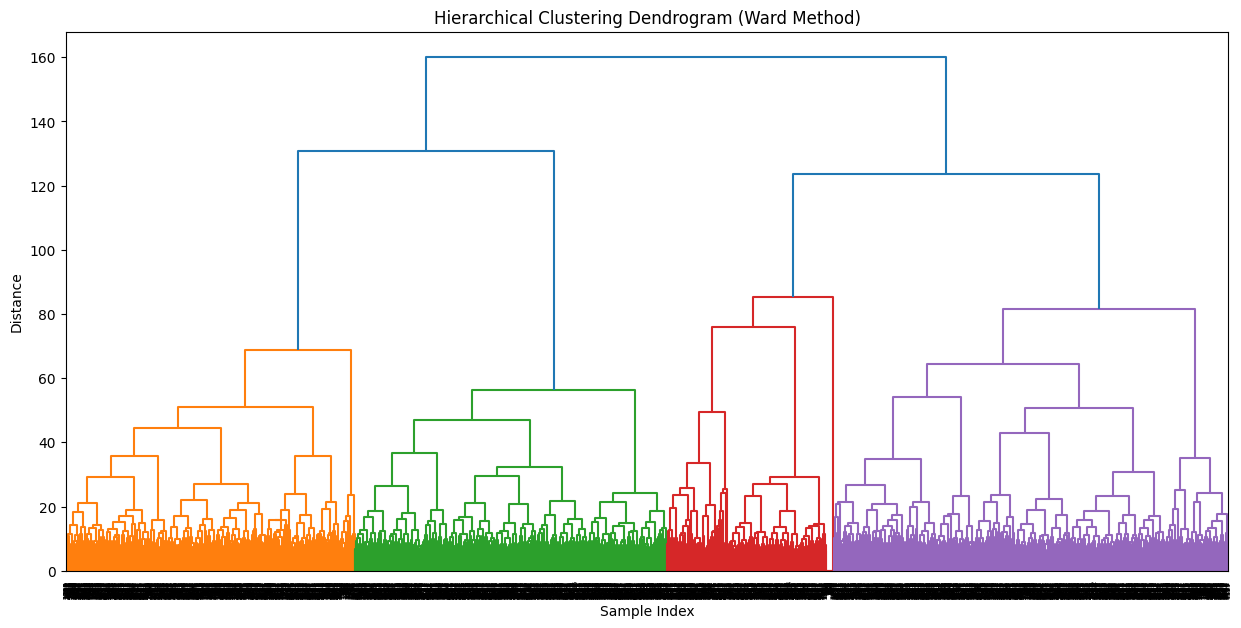


Hierarchical clustering and dendrogram generated.


In [ ]:
# prompt: /content/drive/MyDrive/SICSS/out/Data_CLS.pklからdfを読み込んで、df["cls_vector"]を階層的クラスター分析(ward法)を行い、デンドログラムを出力する
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

# Load the DataFrame from the pkl file
try:
    Data_CLS_filepath = '/content/drive/MyDrive/SICSS/out/Data_CLS.pkl'
    df = pd.read_pickle(Data_CLS_filepath)
    print(f"\nDataFrame loaded successfully from: {Data_CLS_filepath}")
    print(f"Shape of the loaded DataFrame: {df.shape}")
    print("First 5 rows of loaded DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: {Data_CLS_filepath} not found. Please ensure the file exists.")
    df = None
except Exception as e:
    print(f"An error occurred while loading the DataFrame: {e}")
    df = None

# Check if df was loaded and has the 'cls_vector' column
if df is not None and 'cls_vector' in df.columns:
    # Extract the CLS vectors. Ensure they are not None and are numpy arrays.
    # Filter out any None values and ensure they are arrays
    vectors = [vec for vec in df['cls_vector'].tolist() if vec is not None and isinstance(vec, np.ndarray)]

    if len(vectors) > 0:
        # Stack the vectors into a single numpy array
        X = np.vstack(vectors)

        # Perform hierarchical clustering using Ward's method
        # 'ward' minimizes the variance of the clusters being merged.
        linked = linkage(X, 'ward')

        # Plot the dendrogram
        plt.figure(figsize=(15, 7))
        dendrogram(linked,
                   orientation='top',
                   distance_sort='descending',
                   show_leaf_counts=True)
        plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

        print("\nHierarchical clustering and dendrogram generated.")

    else:
        print("\nNo valid CLS vectors found in the DataFrame for clustering.")

else:
    print("\nCould not perform hierarchical clustering: DataFrame not loaded or 'cls_vector' column not found or is empty.")




Dendrogram saved to: /content/drive/MyDrive/SICSS/out/dendrogram_ward.png


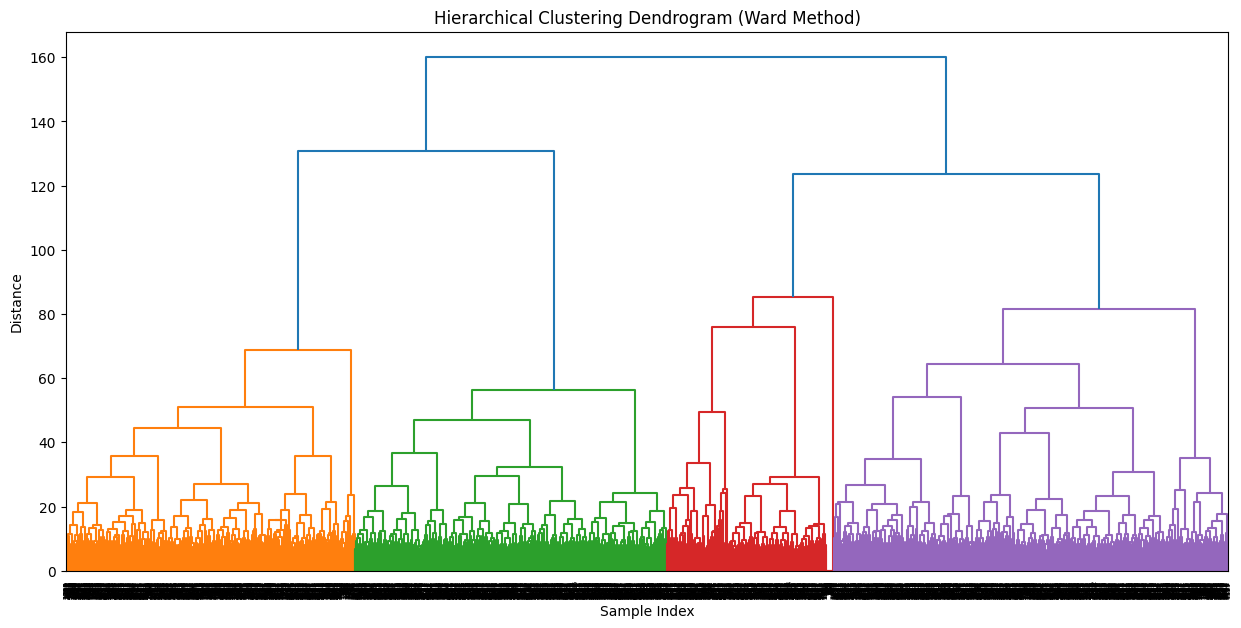

In [ ]:
# prompt: Dendrogramを/content/drive/MyDrive/SICSS/outに保存
output_dir = '/content/drive/MyDrive/SICSS/out'
import os
# Define the path to save the dendrogram image
dendrogram_filepath = os.path.join(output_dir, 'dendrogram_ward.png')

# Check if the dendrogram was successfully plotted in the previous step
# The `plt.show()` call will reset the current figure, so we need to
# regenerate the plot if we want to save it *after* showing it, or
# save it *before* calling show(). Let's save before showing.

# To save the figure, call `plt.savefig()` before `plt.show()`
# Let's modify the plotting part slightly to save it.

# Check if df was loaded and has the 'cls_vector' column and if vectors were extracted
if df is not None and 'cls_vector' in df.columns and len(vectors) > 0:
    # Perform hierarchical clustering using Ward's method
    linked = linkage(X, 'ward')

    # Plot the dendrogram without showing it immediately
    plt.figure(figsize=(15, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    # Save the figure to the specified path
    try:
        plt.savefig(dendrogram_filepath)
        print(f"\nDendrogram saved to: {dendrogram_filepath}")
    except Exception as e:
        print(f"\nError saving dendrogram: {e}")

    # Display the plot
    plt.show()

else:
    print("\nCould not save dendrogram: Check if data was loaded, vectors were extracted, and clustering was performed.")

In [ ]:
# prompt: cluster数=8で、cutして各データのclustering結果を、df["clustering"]に格納。それらの結果を含めて、/content/drive/MyDrive/SICSS/out/にData_cls_clusteringとして保存

from scipy.cluster.hierarchy import cut_tree

# Define the desired number of clusters
num_clusters = 4

# Check if 'linked' (from linkage) was successfully created and if df is available
# Ensure the number of clusters requested is not more than the number of data points
if 'linked' in locals() and df is not None and len(df) >= num_clusters:
    # Cut the dendrogram to form the desired number of clusters
    # cut_tree returns a numpy array where each element is the cluster index for the corresponding data point.
    # The data points in `linked` correspond to the rows in `df_with_vectors` (or df, if no filtering occurred).
    # We need to make sure the cluster assignments align with the original DataFrame indices
    # if any rows were dropped.

    # Let's re-extract the vectors *and* their original indices
    original_indices = df.index[df['cls_vector'].apply(lambda x: x is not None and isinstance(x, np.ndarray))].tolist()
    vectors_for_clustering = [df.loc[i, 'cls_vector'] for i in original_indices]

    if len(vectors_for_clustering) > 0:
        X_for_clustering = np.vstack(vectors_for_clustering)

        # Re-calculate linkage if needed, or ensure 'linked' corresponds to these vectors
        # If the previous linkage calculation was on the same set of vectors, you can reuse 'linked'.
        # If df was filtered *after* linkage, you need to re-calculate linkage on the filtered vectors.
        # Assuming 'linked' was calculated on the same `df` from the loaded pickle file:
        if 'linked' not in locals() or len(linked) != len(X_for_clustering) - 1:
             print("Re-calculating linkage on filtered vectors...")
             linked = linkage(X_for_clustering, 'ward')


        cluster_assignments_array = cut_tree(linked, n_clusters=num_clusters)

        # cut_tree returns a 2D array if k is an integer (n_clusters). We want the first column.
        cluster_assignments = cluster_assignments_array[:, 0]

        # Create a mapping from the original indices (that had vectors) to their cluster assignment
        clustering_results = pd.Series(cluster_assignments, index=original_indices)

        # Add a new column 'clustering' to the original DataFrame and initialize with NaN
        df['clustering'] = np.nan

        # Assign the cluster results back to the DataFrame based on the original indices
        df.loc[original_indices, 'clustering'] = clustering_results

        print(f"\nAssigned {num_clusters} clusters to DataFrame.")
        print("DataFrame head with clustering results:")
        print(df[['description_clean_replaced', 'clustering']].head())
        print("\nCluster distribution:")
        print(df['clustering'].value_counts().sort_index())

        # Define the path to save the final DataFrame
        Data_cls_clustering_filepath = os.path.join(output_dir, 'Data_cls_clustering.pkl')

        # Save the DataFrame with clustering results
        try:
            df.to_pickle(Data_cls_clustering_filepath)
            print(f"\nDataFrame with clustering results saved to: {Data_cls_clustering_filepath}")
        except Exception as e:
            print(f"\nError saving Data_cls_clustering: {e}")

    else:
        print("\nNo valid vectors found to perform clustering.")
else:
    print("\nCould not perform clustering: Linkage results not available, DataFrame not loaded, or insufficient data points for the requested number of clusters.")
    if df is not None:
        print(f"DataFrame size: {len(df)}")
    print(f"Requested number of clusters: {num_clusters}")


Assigned 4 clusters to DataFrame.
DataFrame head with clustering results:
                          description_clean_replaced  clustering
0  Igor Gontarz Instituto Sapientia a lecturer An...         0.0
1  Paulina Klisowska Instituto Sapientia a gradua...         1.0
2  Krzysztof Jeromin Instituto Sapientia a gradua...         2.0
3  Lukasz Szoszkiewicz Instituto Sapientia an Ass...         0.0
4  American Nephrology Nurses Association Przybyl...         3.0

Cluster distribution:
clustering
0.0    1133
1.0    1222
2.0    1546
3.0     653
Name: count, dtype: int64

DataFrame with clustering results saved to: /content/drive/MyDrive/SICSS/out/Data_cls_clustering.pkl


In [ ]:
# prompt: 各clusterの重心を計算。/content/drive/MyDrive/SICSS/outにcentersとして重心を保存

# Check if df was loaded and has the 'cls_vector' and 'clustering' columns
if df is not None and 'cls_vector' in df.columns and 'clustering' in df.columns:
    # Filter out rows that don't have a cluster assignment or vector
    df_clustered = df.dropna(subset=['cls_vector', 'clustering']).copy()

    if not df_clustered.empty:
        # Group the DataFrame by the 'clustering' column and calculate the mean of the 'cls_vector' for each cluster
        # Make sure 'cls_vector' contains numpy arrays that can be averaged
        # The mean operation requires the elements in 'cls_vector' to be amenable to averaging.
        # We can use `groupby()` and then apply a custom aggregation function.

        def calculate_centroid(vectors):
            # Stack the vectors if there are any, otherwise return None
            if vectors.empty:
                return None
            # Filter out None values before stacking
            valid_vectors = [vec for vec in vectors.tolist() if vec is not None]
            if not valid_vectors:
                return None
            stacked_vectors = np.vstack(valid_vectors)
            return np.mean(stacked_vectors, axis=0)

        cluster_centers = df_clustered.groupby('clustering')['cls_vector'].apply(calculate_centroid)

        # Convert the result to a dictionary or Series if needed
        # cluster_centers is a pandas Series where index is cluster ID and value is the centroid vector (numpy array)

        print("\nCalculated cluster centroids:")
        print(cluster_centers)

        # Define the path to save the cluster centers
        cluster_centers_filepath = os.path.join(output_dir, 'centers.pkl') # Using pkl to save numpy arrays

        # Save the cluster centers
        try:
            cluster_centers.to_pickle(cluster_centers_filepath)
            print(f"\nCluster centers saved to: {cluster_centers_filepath}")
        except Exception as e:
            print(f"\nError saving cluster centers: {e}")

    else:
        print("\nNo data points with both vector and cluster assignment found to calculate centers.")

else:
    print("\nCould not calculate cluster centers: DataFrame not loaded or 'cls_vector' or 'clustering' columns not found.")


Calculated cluster centroids:
clustering
0.0    [-0.75013304, -0.03293614, -0.20322512, -0.124...
1.0    [-0.5359475, -0.15213135, -0.4169013, -0.26012...
2.0    [-0.65948164, 0.09115709, -0.2784389, -0.17907...
3.0    [-0.3903314, -0.0029536905, -0.37896022, -0.23...
Name: cls_vector, dtype: object

Cluster centers saved to: /content/drive/MyDrive/SICSS/out/centers.pkl


In [ ]:
# prompt: 重心を初期値にして、k-meansで再分類。

from sklearn.cluster import KMeans

# Check if df was loaded and has the 'cls_vector' and 'clustering' columns
if df is not None and 'cls_vector' in df.columns and 'clustering' in df.columns:
    # Filter out rows that don't have a vector
    df_for_kmeans = df.dropna(subset=['cls_vector']).copy()

    if not df_for_kmeans.empty:
        # Extract the vectors as a numpy array
        X_kmeans = np.vstack(df_for_kmeans['cls_vector'].tolist())

        # Check if cluster centers were calculated successfully
        if 'cluster_centers' in locals() and cluster_centers is not None and not cluster_centers.empty:
             # Prepare initial centroids for KMeans.
             # The order of centroids in `cluster_centers` Series matches the cluster ID.
             # We need to ensure the initial_centroids are in the correct format (numpy array)
             # and ordered by cluster ID.
             initial_centroids = np.vstack(cluster_centers.sort_index().tolist())

             # Check if the number of initial centroids matches the desired number of clusters
             # and if the number of dimensions matches the data vectors
             if initial_centroids.shape[0] == num_clusters and initial_centroids.shape[1] == X_kmeans.shape[1]:
                 print(f"\nPerforming KMeans clustering with {num_clusters} clusters using calculated centroids as initial values...")

                 # Initialize KMeans with the calculated centroids
                 # We set n_init=1 because we are providing the initial centroids
                 # We set max_iter to a reasonable number
                 kmeans = KMeans(n_clusters=num_clusters, init=initial_centroids, n_init=1, max_iter=300, random_state=42)

                 # Fit KMeans to the data
                 kmeans.fit(X_kmeans)

                 # Get the new cluster assignments
                 new_cluster_assignments_array = kmeans.labels_

                 # Create a pandas Series for the new assignments, aligned with the indices of df_for_kmeans
                 new_clustering_results = pd.Series(new_cluster_assignments_array, index=df_for_kmeans.index)

                 # Add a new column 'clustering_kmeans_reassigned' to the original DataFrame
                 # Initialize with NaN or None if you prefer
                 df['clustering_kmeans_reassigned'] = np.nan # Use float Nan for numerical columns

                 # Assign the new cluster results back to the DataFrame based on the original indices
                 df.loc[new_clustering_results.index, 'clustering_kmeans_reassigned'] = new_clustering_results

                 print("\nKMeans reassignment complete.")
                 print("DataFrame head with new clustering results:")
                 print(df[['description_clean_replaced', 'clustering', 'clustering_kmeans_reassigned']].head())
                 print("\nNew Cluster distribution (KMeans reassigned):")
                 print(df['clustering_kmeans_reassigned'].value_counts().sort_index())

                 # Optionally, you can save the updated DataFrame
                 Data_cls_kmeans_reassigned_filepath = os.path.join(output_dir, 'Data_cls_kmeans_reassigned.pkl')
                 try:
                     df.to_pickle(Data_cls_kmeans_reassigned_filepath)
                     print(f"\nDataFrame with KMeans reassigned clustering results saved to: {Data_cls_kmeans_reassigned_filepath}")
                 except Exception as e:
                     print(f"\nError saving Data_cls_kmeans_reassigned: {e}")

             else:
                 print(f"\nError: Mismatch between calculated centroids shape ({initial_centroids.shape}) and expected shape ({num_clusters}, {X_kmeans.shape[1]}). Cannot use them as initial centroids.")
        else:
            print("\nCluster centers not found or are empty. Cannot use them for KMeans initialization.")
            print("Proceeding with default KMeans initialization (k-means++).")
            # If centroids are not available, perform standard KMeans initialization
            kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10) # Use default k-means++ init
            kmeans.fit(X_kmeans)
            new_cluster_assignments_array = kmeans.labels_
            new_clustering_results = pd.Series(new_cluster_assignments_array, index=df_for_kmeans.index)
            df['clustering_kmeans_default'] = np.nan
            df.loc[new_clustering_results.index, 'clustering_kmeans_default'] = new_clustering_results
            print("\nKMeans with default initialization complete.")
            print("DataFrame head with default KMeans clustering results:")
            print(df[['description_clean_replaced', 'clustering', 'clustering_kmeans_default']].head())
            print("\nCluster distribution (Default KMeans):")
            print(df['clustering_kmeans_default'].value_counts().sort_index())


    else:
        print("\nNo data points with vectors found to perform KMeans clustering.")

else:
    print("\nCould not perform KMeans clustering: DataFrame not loaded or 'cls_vector' column not found.")

SyntaxError: invalid syntax (<ipython-input-13-3270605011>, line 86)

In [ ]:
# prompt: 再分類した結果を、df["k-means"]に入れる。新しく、dfを/content/drive/MyDrive/SICSS/outに、Data_cls_kmeansとして保存

# Reassign the column name
# Check if the column 'clustering_kmeans_reassigned' exists. If not, check for 'clustering_kmeans_default'
if 'clustering_kmeans_reassigned' in df.columns:
    df["k-means"] = df["clustering_kmeans_reassigned"]
    print("\n'clustering_kmeans_reassigned' column copied to 'k-means'.")
elif 'clustering_kmeans_default' in df.columns:
    df["k-means"] = df["clustering_kmeans_default"]
    print("\n'clustering_kmeans_default' column copied to 'k-means'.")
else:
    print("\nNeither 'clustering_kmeans_reassigned' nor 'clustering_kmeans_default' column found.")
    print("No column was copied to 'k-means'.")

# Define the path to save the final DataFrame
Data_cls_kmeans_filepath = os.path.join(output_dir, 'Data_cls_kmeans.pkl')

# Save the DataFrame
if df is not None:
    try:
        df.to_pickle(Data_cls_kmeans_filepath)
        print(f"\nDataFrame with 'k-means' column saved to: {Data_cls_kmeans_filepath}")
        print("\nFinal DataFrame head with 'k-means' column:")
        print(df[['description_clean_replaced', 'clustering', 'k-means']].head())
        print("\nFinal 'k-means' cluster distribution:")
        print(df['k-means'].value_counts().sort_index())
    except Exception as e:
        print(f"\nError saving Data_cls_kmeans: {e}")
else:
    print("\nDataFrame is not loaded. Cannot save the file.")

In [ ]:
# prompt: k-meansの結果を、interactive plotとして作成。カーソルに合わせるて、参加したYear, location,city,roleが表示される。

!pip install plotly cufflinks

import plotly.express as px

# Check if df is loaded and has the necessary columns
if df is not None and 'cls_vector' in df.columns and 'k-means' in df.columns and 'Year' in df.columns and 'location' in df.columns and 'city' in df.columns and 'role' in df.columns:

    # Filter out rows that don't have a vector or k-means assignment
    df_plot = df.dropna(subset=['cls_vector', 'k-means']).copy()

    if not df_plot.empty:
        # Reduce dimensionality for visualization (e.g., using PCA or t-SNE)
        # Since we have BERT vectors (likely high dimensional), direct plotting is not feasible.
        # Let's use PCA for simplicity here. You might want to experiment with t-SNE for better visualization of clusters.
        from sklearn.decomposition import PCA

        # Extract the vectors
        X_plot = np.vstack(df_plot['cls_vector'].tolist())

        # Apply PCA to reduce to 2 components for a 2D scatter plot
        # You might need to install scikit-learn if you haven't already: !pip install scikit-learn
        try:
            pca = PCA(n_components=2, random_state=42)
            components = pca.fit_transform(X_plot)

            # Add the PCA components to the DataFrame
            df_plot['pca_component_1'] = components[:, 0]
            df_plot['pca_component_2'] = components[:, 1]

            # Convert the 'k-means' column to string or category for discrete coloring
            df_plot['k-means'] = df_plot['k-means'].astype(str)
            df_plot['Year'] = df_plot['Year'].astype(str) # Convert Year to string for hover

            # Create the interactive scatter plot using Plotly Express
            fig = px.scatter(df_plot,
                             x='pca_component_1',
                             y='pca_component_2',
                             color='k-means',         # Color points by k-means cluster
                             hover_data=['Year', 'location', 'city', 'role', 'k-means'], # Data to show on hover
                             title='K-Means Clustering Results (PCA Reduced Dimensions)',
                             labels={'pca_component_1': 'PCA Component 1',
                                     'pca_component_2': 'PCA Component 2',
                                     'k-means': 'Cluster ID'})

            # Display the plot
            fig.show()

        except Exception as e:
            print(f"\nAn error occurred during PCA or Plotly plotting: {e}")

    else:
        print("\nNo data points with vectors and k-means assignment found for plotting.")

else:
    print("\nCould not create interactive plot: DataFrame not loaded or required columns ('cls_vector', 'k-means', 'Year', 'location', 'city', 'role') not found.")



In [ ]:
# prompt: df['cls_vector']から、clustering数を決めたい

!pip install scikit-learn matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Check if df_with_vectors is available and has 'cls_vector'
if 'df_with_vectors' in locals() and not df_with_vectors.empty and 'cls_vector' in df_with_vectors.columns:

    # Prepare the data for clustering
    # Convert the list of numpy arrays in the 'cls_vector' column into a 2D numpy array
    # Ensure all vectors have the same dimension, otherwise handle potential errors
    try:
        X = np.vstack(df_with_vectors['cls_vector'].values)
        print(f"\nSuccessfully stacked {len(X)} CLS vectors of dimension {X.shape[1]}.")
    except ValueError as e:
        print(f"Error stacking vectors: {e}. Ensure all vectors have the same dimension.")
        # Handle the error, maybe inspect problematic rows or skip clustering
        X = None # Set X to None to skip clustering


    if X is not None:
        # Determine the range of cluster numbers to evaluate
        # A common range is from 2 up to sqrt(n_samples) or n_samples/2, or simply a reasonable upper bound
        max_k = min(len(X) // 2, 20) # Evaluate up to 20 clusters or half the number of samples
        if max_k < 2:
            print("\nNot enough data points to perform clustering (need at least 2).")
            # exit() # Or handle appropriately
        else:
            k_range = range(2, max_k + 1)

            # Initialize lists to store inertia and silhouette scores
            inertia = []
            silhouette_scores = []

            print("\nEvaluating different numbers of clusters (K-means)...")
            # Elbow Method and Silhouette Score Method to find optimal number of clusters
            for k in k_range:
                print(f"  Testing k = {k}...")
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
                kmeans.fit(X)
                inertia.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center

                # Calculate silhouette score only if there are more than 1 cluster and samples > k
                if k > 1 and len(X) > k:
                    score = silhouette_score(X, kmeans.labels_)
                    silhouette_scores.append(score)
                else:
                    silhouette_scores.append(None) # Append None if score cannot be calculated

            # Plotting the Elbow Method
            plt.figure(figsize=(10, 5))
            plt.plot(k_range, inertia, marker='o')
            plt.title('Elbow Method')
            plt.xlabel('Number of clusters (k)')
            plt.ylabel('Inertia')
            plt.xticks(k_range)
            plt.grid(True)
            plt.show()

            # Plotting the Silhouette Scores
            # Filter out None values for plotting
            plottable_silhouette_scores = [score for score in silhouette_scores if score is not None]
            plottable_k_range = [k for k, score in zip(k_range, silhouette_scores) if score is not None]

            if plottable_silhouette_scores:
                plt.figure(figsize=(10, 5))
                plt.plot(plottable_k_range, plottable_silhouette_scores, marker='o')
                plt.title('Silhouette Method')
                plt.xlabel('Number of clusters (k)')
                plt.ylabel('Silhouette Score')
                plt.xticks(plottable_k_range)
                plt.grid(True)
                plt.show()

                # Optional: Print the silhouette scores
                print("\nSilhouette Scores for each k:")
                for k, score in zip(plottable_k_range, plottable_silhouette_scores):
                    print(f"  k = {k}: {score:.4f}")

            else:
                print("\nCould not plot Silhouette Scores (need at least 2 clusters and more samples than clusters).")

            print("\nAnalyze the plots to determine the optimal number of clusters.")
            print("The Elbow Method looks for a point where the rate of decrease in inertia changes significantly.")
            print("The Silhouette Method looks for the highest score, indicating denser and better-separated clusters.")

else:
    print("\nDataFrame 'df_with_vectors' not found or is empty, or 'cls_vector' column is missing.")
    print("Please ensure the previous steps for generating and saving CLS vectors were successful.")



In [ ]:
# prompt: description_cleanからnoun_chunksを抜き出すコードを書いて。

import spacy

# Load a spaCy model for English
# You might need to install it first: !python -m spacy download en_core_web_sm
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    """
    Extracts geographical information and institution names from text using spaCy.

    Args:
        text (str): The input text string.

    Returns:
        dict: A dictionary containing lists of extracted locations and organizations.
    """
    doc = nlp(text)
    locations = []
    organizations = []

    # Extract named entities with labels GPE (geopolitical entity) and ORG (organization)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            locations.append(ent.text)
        elif ent.label_ == "ORG":
            organizations.append(ent.text)

    return {"locations": locations, "organizations": organizations}

In [ ]:
# prompt: # Apply the extraction function to the 'description_clean' column

if df is not None and 'description_clean' in df.columns:
    # Apply the extraction function
    df['extracted_entities'] = df['description_clean'].apply(extract_entities)

    # Display the first few rows with the new column
    print("\nDataFrame with extracted entities:")
    print(df[['description_clean', 'extracted_entities']].head())
elif df is None:
    print("DataFrame not loaded, skipping entity extraction.")
else:
    print("Column 'description_clean' not found in the DataFrame.")


DataFrame with extracted entities:
                                   description_clean  \
0  Igor Gontarz is a lecturer at the Adam Mickiew...   
1  Paulina Klisowska is a graduate at the Faculty...   
2  Krzysztof Jeromin is a graduate student in Eur...   
3  Lukasz Szoszkiewicz is an Assistant Professor ...   
4  Anna Przybylska is a fourth-year Law student a...   

                                  extracted_entities  
0  {'locations': ['Poznań'], 'organizations': ['t...  
1  {'locations': ['Paulina', 'Klisowska'], 'organ...  
2  {'locations': ['Estonia'], 'organizations': ['...  
3  {'locations': ['Szoszkiewicz'], 'organizations...  
4  {'locations': ['Poznań'], 'organizations': ['A...  


In [ ]:
# Apply the extraction function to the 'description_clean' column
if df is not None and 'description_clean' in df.columns:
    # Apply the function and store the results in new columns
    df['extracted_entities'] = df['description_clean_replaced'].apply(lambda x: extract_entities(str(x)))

    # Optionally, you can create separate columns for locations and organizations
    df['extracted_locations'] = df['extracted_entities'].apply(lambda x: x['locations'])
    df['extracted_organizations'] = df['extracted_entities'].apply(lambda x: x['organizations'])

    print("\nEntities extracted and added to the dataframe.")
    print(df[['description_clean_replaced', 'extracted_locations', 'extracted_organizations']].head())
else:
    print("Dataframe not loaded or 'description_clean' column not found. Cannot perform entity extraction.")
